In [1]:
import pandas as pd
data = pd.read_excel('PM25_Process.xlsx')
day = []
for i in range(365):
    day.append(i)
data['Day'] = day
data.head()

,Unnamed: 0,TT,Tempreture,Humid,Wind Speed,Wind Direction Sin,Wind Direction COS,Pressure,RainFall,Day
0,0,40.363636,19.0,47.125,1.87500,-0.9397,-0.342020,1011.76,0.00,0
1,1,41.541667,20.7,45.000,2.62500,0.7660,-0.642788,1012.04,0.10,1
2,2,43.416667,19.9,54.375,5.42857,0.4999,-0.866025,1007.88,0.61,2
3,3,38.291667,16.6,91.250,2.87500,0.9397,-0.342020,1008.66,22.00,3
4,4,23.681818,18.9,70.125,1.87500,-0.5000,0.866025,1007.70,1.00,4


In [87]:
data.corr()

,Unnamed: 0,TT,Tempreture,Humid,Wind Speed,Wind Direction Sin,Wind Direction COS,Pressure,RainFall,Day
Unnamed: 0,1.000000,0.152489,-0.653723,0.526875,-0.341412,0.103535,-0.006275,0.545694,0.082953,1.000000
TT,0.152489,1.000000,-0.158486,0.263326,0.008724,0.068675,-0.051769,0.132811,-0.006119,0.152489
Tempreture,-0.653723,-0.158486,1.000000,-0.696752,0.341015,-0.227174,-0.011811,-0.935022,-0.160012,-0.653723
Humid,0.526875,0.263326,-0.696752,1.000000,-0.306427,0.210121,-0.062827,0.628884,0.326711,0.526875
Wind Speed,-0.341412,0.008724,0.341015,-0.306427,1.000000,-0.099047,-0.056553,-0.369930,0.059238,-0.341412
Wind Direction Sin,0.103535,0.068675,-0.227174,0.210121,-0.099047,1.000000,-0.276904,0.217197,0.130995,0.103535
Wind Direction COS,-0.006275,-0.051769,-0.011811,-0.062827,-0.056553,-0.276904,1.000000,0.090449,-0.116540,-0.006275
Pressure,0.545694,0.132811,-0.935022,0.628884,-0.369930,0.217197,0.090449,1.000000,0.107920,0.545694
RainFall,0.082953,-0.006119,-0.160012,0.326711,0.059238,0.130995,-0.116540,0.107920,1.000000,0.082953
Day,1.000000,0.152489,-0.653723,0.526875,-0.341412,0.103535,-0.006275,0.545694,0.082953,1.000000


In [12]:
X = data[['Humid','Wind Speed','Wind Direction Sin','Wind Direction COS','Pressure','RainFall','Day']]
X = X.values
Y = data['TT']
Y = Y.values


from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=7)
X_sklearn = sklearn_pca.fit_transform(X)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, random_state=0 ,test_size=0.2)

# MLP

In [50]:
import keras
from keras.layers import Dense
from keras.models import Sequential
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=7))
model.add(Dense(15,activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=2000,batch_size=len(x_train), verbose=0)
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 8ms/step - loss: 3873.7188


3873.71875

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
y_new_inverse3 = model.predict(x_test)
mse33 = mean_squared_error(y_test, y_new_inverse3)
mae33 = mean_absolute_error(y_test, y_new_inverse3)
rmse33 = math.sqrt(mse33)
print('mse : %.3f'%mse33)
print('rmse : %.3f'%rmse33)
print('mae : %.3f'%mae33)

mse : 3732.736
rmse : 61.096
mae : 25.807


(10, 180)

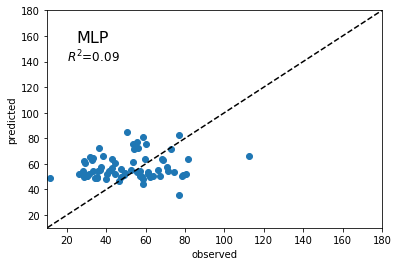

In [48]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score
plt.scatter(y_test,y_new_inverse3)
plt.plot([0, 250], [0, 250], '--k')
plt.ylabel('predicted')
plt.xlabel('observed')
plt.text(25,155,'MLP',fontsize=16)
plt.text(20,140, r'$R^2$=%.2f'% (
       r2_score(y_test,y_new_inverse3)),fontsize=12)
plt.xlim([10, 180])
plt.ylim([10, 180])

In [49]:
model_json1 = model.to_json()
with open("MLP_PM25_without_Autocorelation_1.json", "w") as json_file:
    json_file.write(model_json1)
# serialize weights to HDF5
model.save_weights("MLP_PM25_without_Autocorelation_1.h5")
print("Saved model to disk")

Saved model to disk


# Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
regressor10 = RandomForestRegressor(n_estimators=60, random_state=0)
regressor10.fit(x_train, y_train)
y_new_inverse30 = regressor10.predict(x_test)
mse33 = mean_squared_error(y_test, y_new_inverse30)
mae33 = mean_absolute_error(y_test, y_new_inverse30)
rmse33 = math.sqrt(mse33)
print('mse : %.3f'%mse33)
print('rmse : %.3f'%rmse33)
print('mae : %.3f'%mae33)

mse : 2839.171
rmse : 53.284
mae : 21.342


(10, 180)

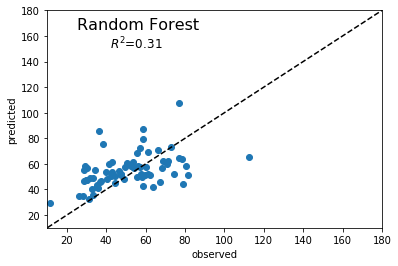

In [36]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score
plt.scatter(y_test,y_new_inverse30)
plt.plot([0, 250], [0, 250], '--k')
plt.ylabel('predicted')
plt.xlabel('observed')
plt.text(25,165,'Random Forest',fontsize=16)
plt.text(42,150, r'$R^2$=%.2f'% (
       r2_score(y_test,y_new_inverse30)),fontsize=12)
plt.xlim([10, 180])
plt.ylim([10, 180])

# Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
sklinreg = LinearRegression()
sklinreg.fit(x_train, y_train)
y_ord_pred = sklinreg.predict(x_test)
mse33 = mean_squared_error(y_test, y_ord_pred)
mae33 = mean_absolute_error(y_test, y_ord_pred)
rmse33 = math.sqrt(mse33)
print('mse : %.3f'%mse33)
print('rmse : %.3f'%rmse33)
print('mae : %.3f'%mae33)

mse : 1492.374
rmse : 38.631
mae : 24.098


(10, 180)

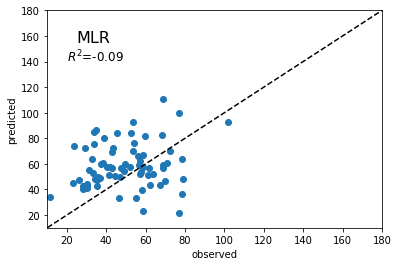

In [49]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score
plt.scatter(y_test,y_ord_pred)
plt.plot([0, 250], [0, 250], '--k')
plt.ylabel('predicted')
plt.xlabel('observed')
plt.text(25,155,'MLR',fontsize=16)
plt.text(20,140, r'$R^2$=%.2f'% (
       r2_score(y_test,y_ord_pred)),fontsize=12)
plt.xlim([10, 180])
plt.ylim([10, 180])